Next Code is for loading all the required libraries

In [169]:
library(package = "base")
library(caTools)
library(class)
library(dplyr)
library(caret)
library(randomForest)
library(e1071)
library(kernlab)

This code is to set the working directory and set arbitary parameters required throughout the code.

In [170]:
setwd(dir = "C:/Users/Prathmesh Gardi/Desktop/Coursework_7141CEM_Big_Data")
set.seed(255)

This code reads the data from CSV files and performes preprocessing tasks

In [171]:
vehicles <- read.csv("vehicle.csv")
str(vehicles)
any(is.na(vehicles))
vehicles<-na.omit(vehicles)
any(is.na(vehicles))

'data.frame':	846 obs. of  19 variables:
 $ compactness                : int  95 91 104 93 85 107 97 90 86 93 ...
 $ circularity                : int  48 41 50 41 44 NA 43 43 34 44 ...
 $ distance_circularity       : int  83 84 106 82 70 106 73 66 62 98 ...
 $ radius_ratio               : int  178 141 209 159 205 172 173 157 140 NA ...
 $ pr.axis_aspect_ratio       : int  72 57 66 63 103 50 65 65 61 62 ...
 $ max.length_aspect_ratio    : int  10 9 10 9 52 6 6 9 7 11 ...
 $ scatter_ratio              : int  162 149 207 144 149 255 153 137 122 183 ...
 $ elongatedness              : int  42 45 32 46 45 26 42 48 54 36 ...
 $ pr.axis_rectangularity     : int  20 19 23 19 19 28 19 18 17 22 ...
 $ max.length_rectangularity  : int  159 143 158 143 144 169 143 146 127 146 ...
 $ scaled_variance            : int  176 170 223 160 241 280 176 162 141 202 ...
 $ scaled_variance.1          : int  379 330 635 309 325 957 361 281 223 505 ...
 $ scaled_radius_of_gyration  : int  184 158 220 127 188 26

[1] TRUE

[1] FALSE

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  73.00   87.00   93.00   93.66  100.00  119.00 

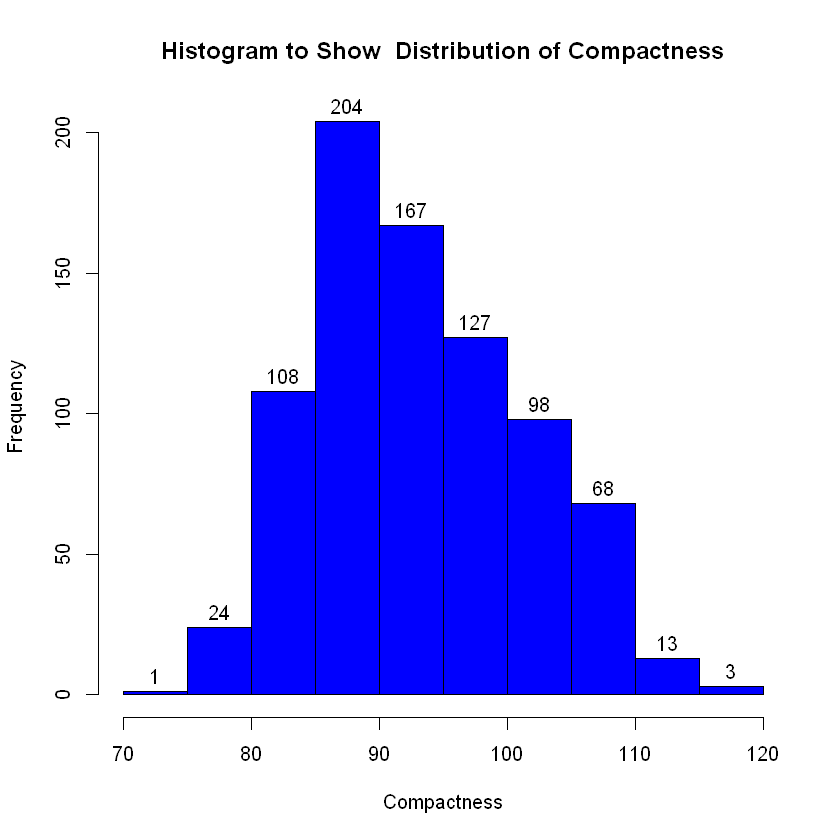

In [172]:
summary(vehicles$compactness)
hist(vehicles$compactness,
    col="blue",
    main="Histogram to Show  Distribution of Compactness",
    xlab="Compactness",
    ylab="Frequency",
    labels=TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   33.0    40.0    44.0    44.8    49.0    59.0 

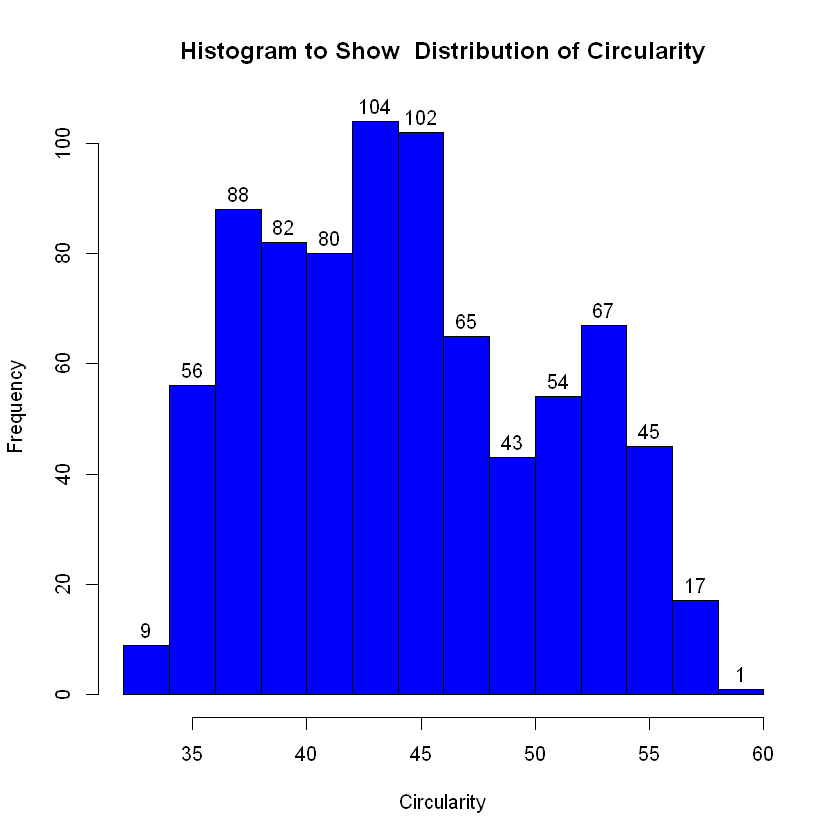

In [173]:
summary(vehicles$circularity)
hist(vehicles$circularity,
    col="blue",
    main="Histogram to Show  Distribution of Circularity",
    xlab="Circularity",
    ylab="Frequency",
    labels=TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  40.00   70.00   79.00   82.04   98.00  112.00 

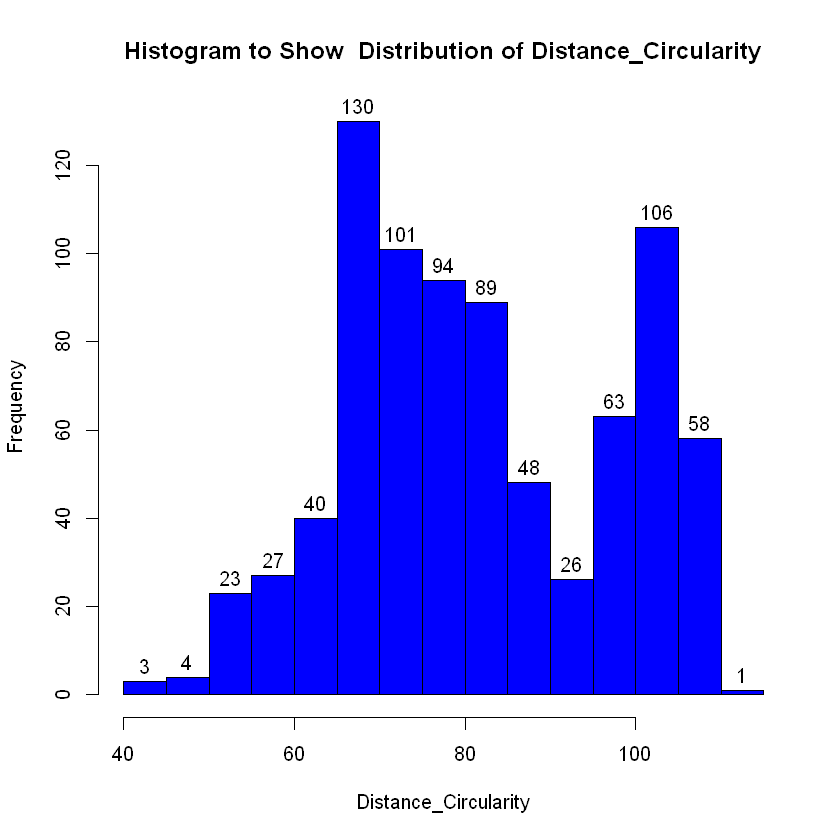

In [174]:
summary(vehicles$distance_circularity)
hist(vehicles$distance_circularity,
    col="blue",
    main="Histogram to Show  Distribution of Distance_Circularity",
    xlab="Distance_Circularity",
    ylab="Frequency",
    labels=TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.0   141.0   167.0   169.1   195.0   333.0 

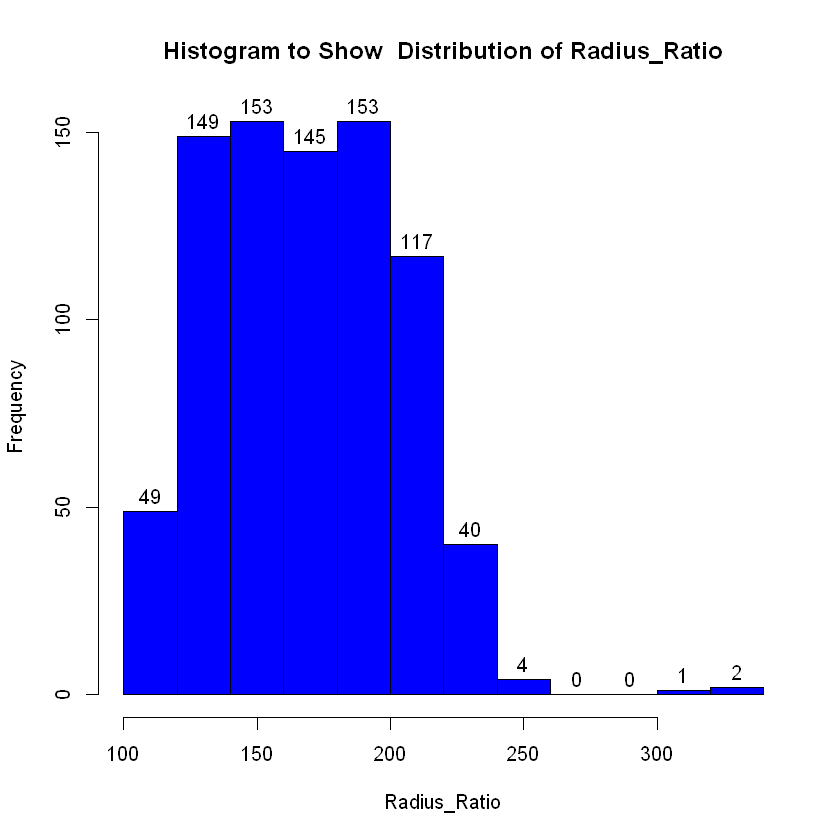

In [175]:
summary(vehicles$radius_ratio)
hist(vehicles$radius_ratio,
    col="blue",
    main="Histogram to Show  Distribution of Radius_Ratio",
    xlab="Radius_Ratio",
    ylab="Frequency",
    labels=TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  47.00   57.00   61.00   61.77   65.00  138.00 

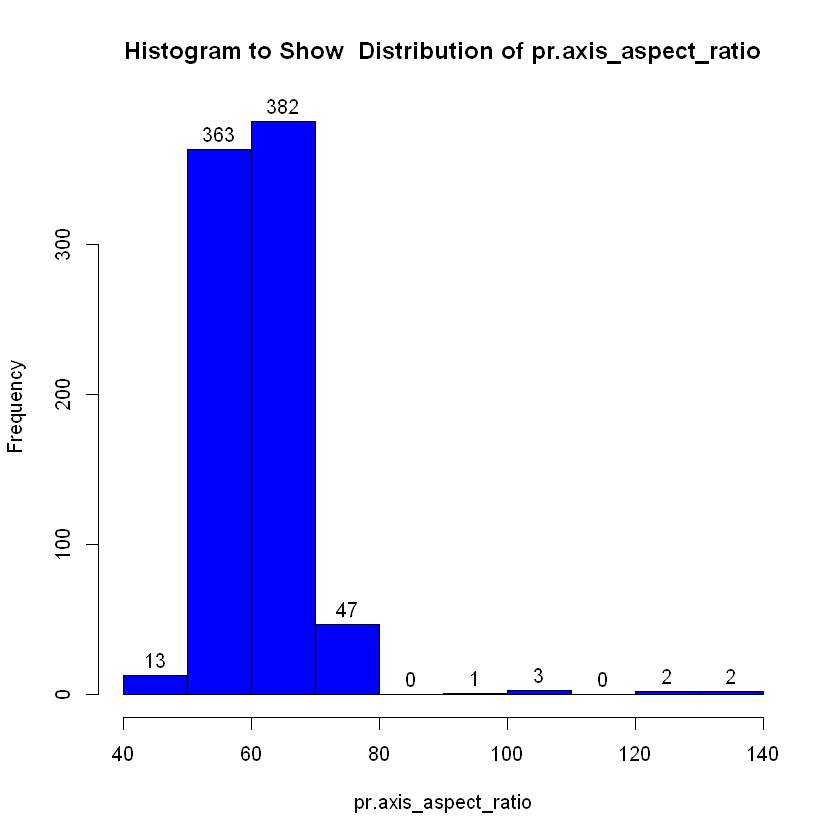

In [176]:
summary(vehicles$pr.axis_aspect_ratio)
hist(vehicles$pr.axis_aspect_ratio,
    col="blue",
    main="Histogram to Show  Distribution of pr.axis_aspect_ratio",
    xlab="pr.axis_aspect_ratio",
    ylab="Frequency",
    labels=TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   7.000   8.000   8.599  10.000  55.000 

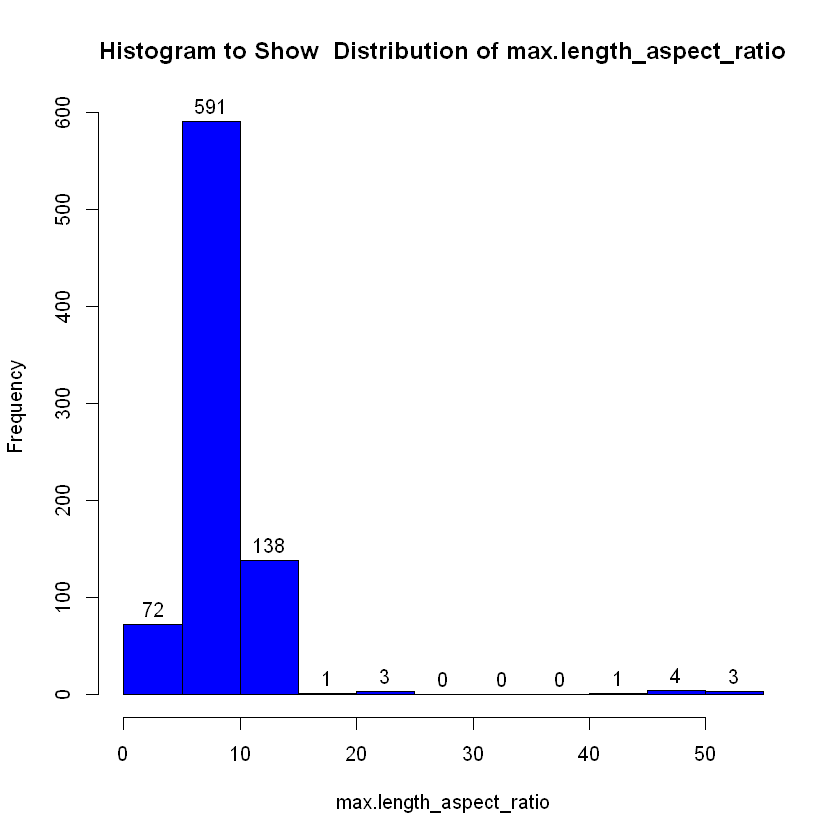

In [177]:
summary(vehicles$max.length_aspect_ratio)
hist(vehicles$max.length_aspect_ratio,
    col="blue",
    main="Histogram to Show  Distribution of max.length_aspect_ratio",
    xlab="max.length_aspect_ratio",
    ylab="Frequency",
    labels=TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  112.0   146.0   157.0   168.6   198.0   265.0 

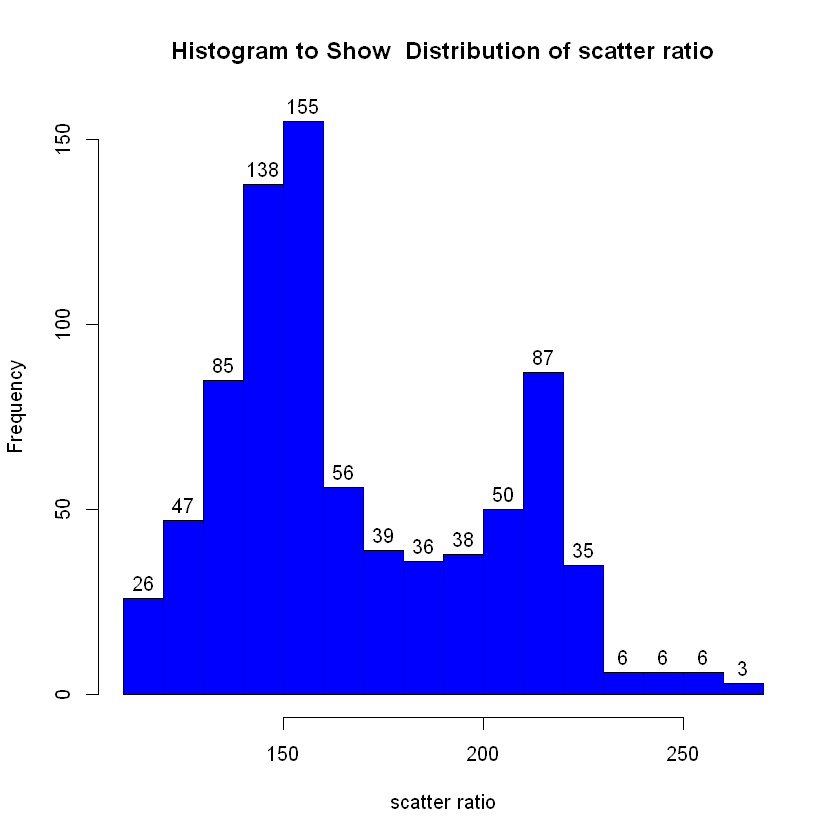

In [178]:
summary(vehicles$scatter_ratio)
hist(vehicles$scatter_ratio,
    col="blue",
    main="Histogram to Show  Distribution of scatter ratio",
    xlab="scatter ratio",
    ylab="Frequency",
    labels=TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  26.00   33.00   43.00   40.99   46.00   61.00 

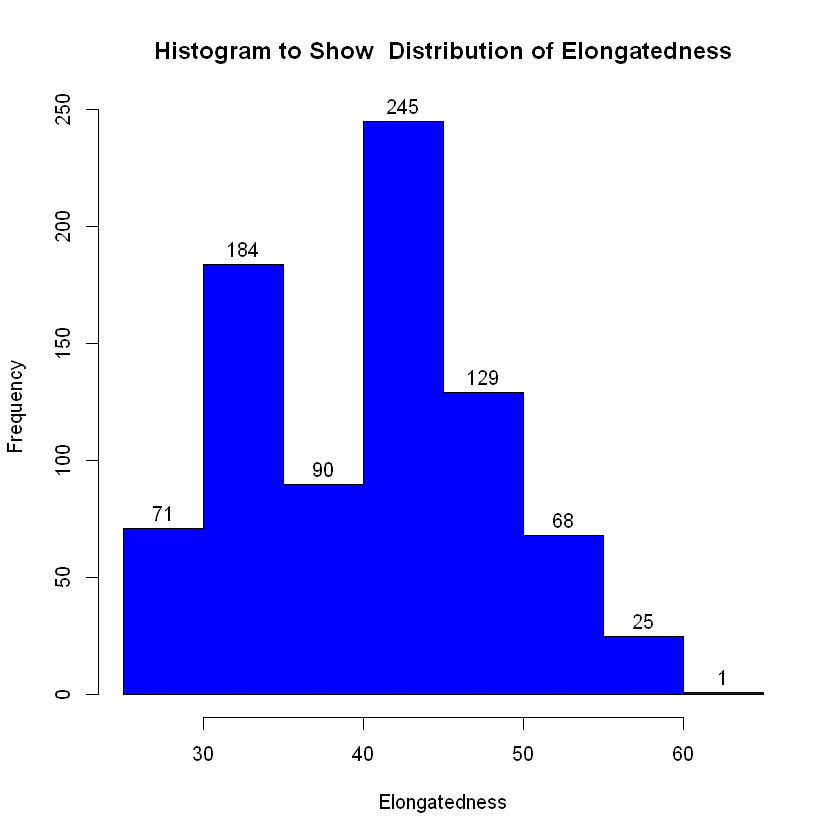

In [179]:
summary(vehicles$elongatedness)
hist(vehicles$elongatedness,
    col="blue",
    main="Histogram to Show  Distribution of Elongatedness",
    xlab="Elongatedness",
    ylab="Frequency",
    labels=TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   19.00   20.00   20.56   23.00   29.00 

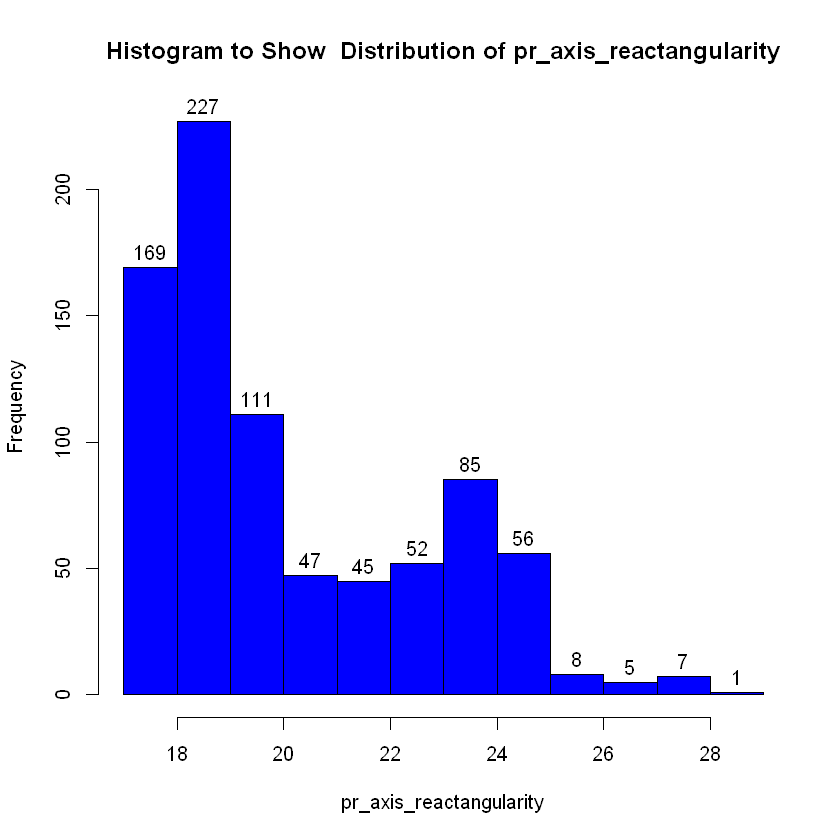

In [180]:
summary(vehicles$pr.axis_rectangularity)
hist(vehicles$pr.axis_rectangularity,
    col="blue",
    main="Histogram to Show  Distribution of pr_axis_reactangularity",
    xlab="pr_axis_reactangularity",
    ylab="Frequency",
    labels=TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  118.0   137.0   146.0   147.9   159.0   188.0 

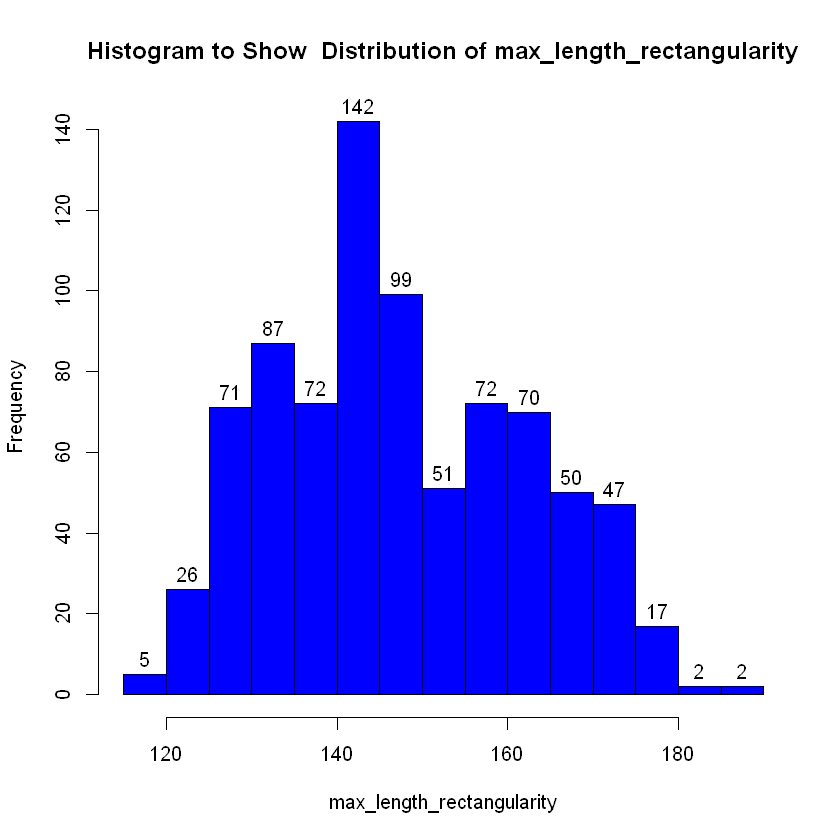

In [181]:
summary(vehicles$max.length_rectangularity)
hist(vehicles$max.length_rectangularity,
    col="blue",
    main="Histogram to Show  Distribution of max_length_rectangularity",
    xlab="max_length_rectangularity",
    ylab="Frequency",
    labels=TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  130.0   167.0   179.0   188.4   217.0   320.0 

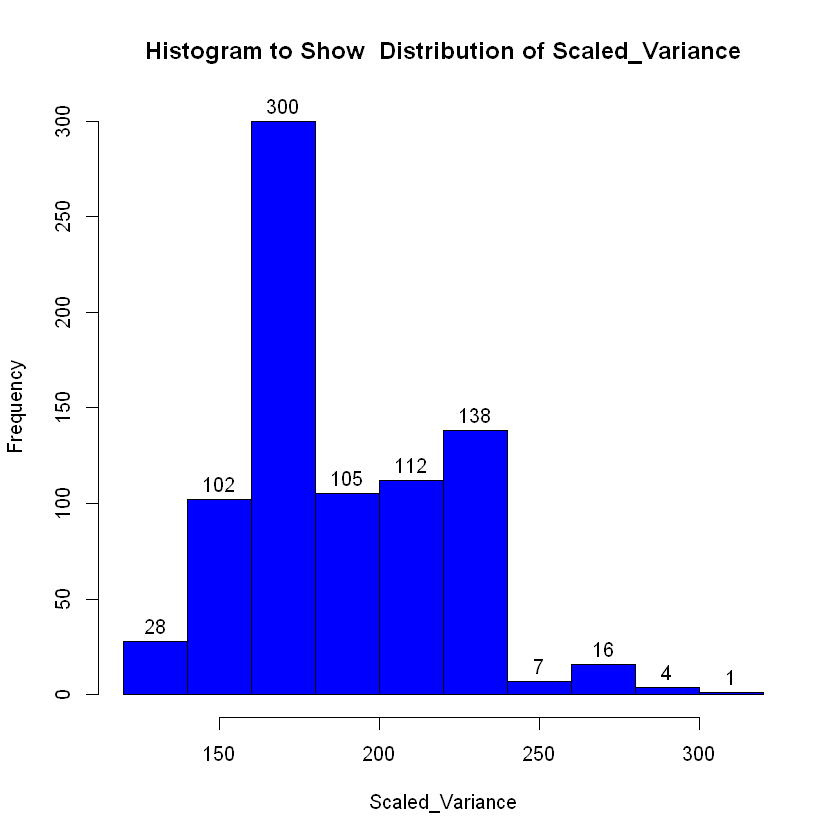

In [182]:
summary(vehicles$scaled_variance)
hist(vehicles$scaled_variance,
    col="blue",
    main="Histogram to Show  Distribution of Scaled_Variance",
    xlab="Scaled_Variance",
    ylab="Frequency",
    labels=TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  184.0   318.0   364.0   438.4   586.0  1018.0 

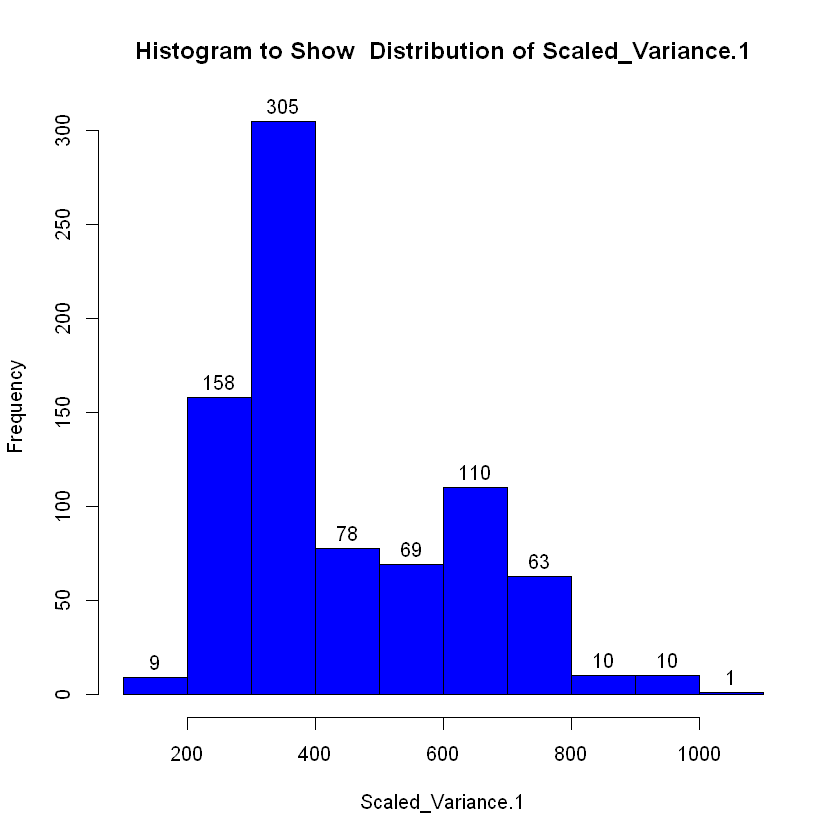

In [183]:
summary(vehicles$scaled_variance.1)
hist(vehicles$scaled_variance.1,
    col="blue",
    main="Histogram to Show  Distribution of Scaled_Variance.1",
    xlab="Scaled_Variance.1",
    ylab="Frequency",
    labels=TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  109.0   149.0   173.0   174.3   198.0   268.0 

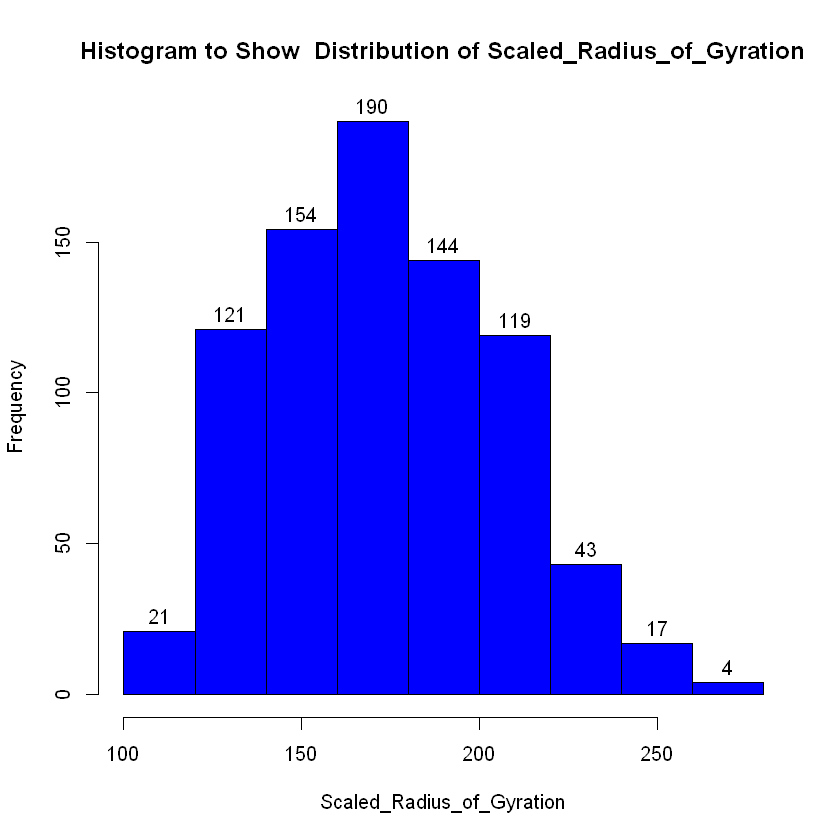

In [184]:
summary(vehicles$scaled_radius_of_gyration)
hist(vehicles$scaled_radius_of_gyration,
    col="blue",
    main="Histogram to Show  Distribution of Scaled_Radius_of_Gyration",
    xlab="Scaled_Radius_of_Gyration",
    ylab="Frequency",
    labels=TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   59.0    67.0    71.0    72.4    75.0   135.0 

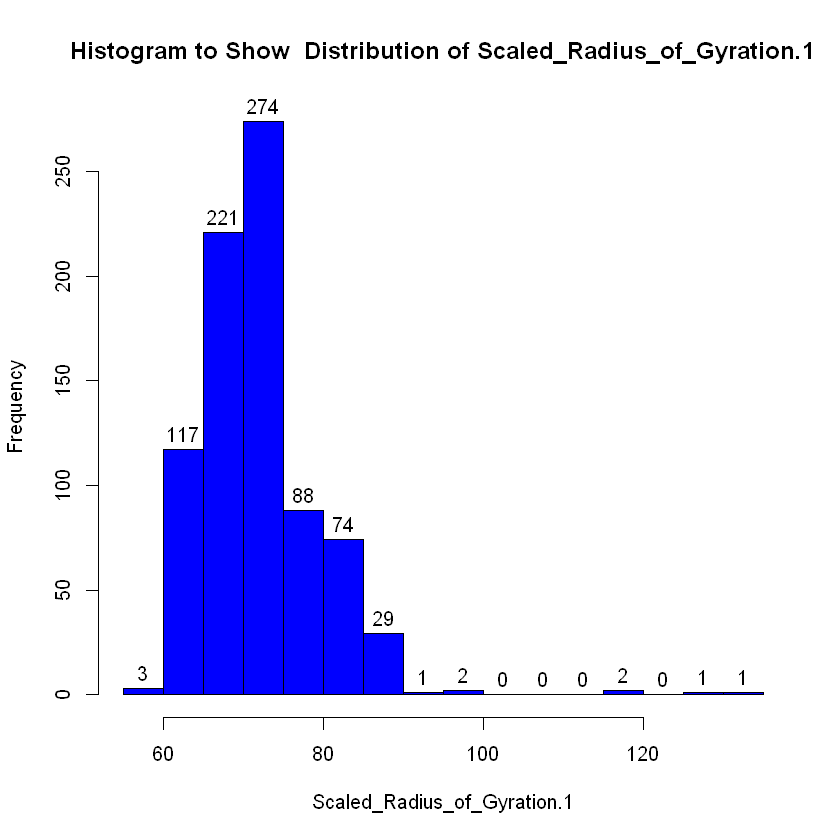

In [185]:
summary(vehicles$scaled_radius_of_gyration.1)
hist(vehicles$scaled_radius_of_gyration.1,
    col="blue",
    main="Histogram to Show  Distribution of Scaled_Radius_of_Gyration.1",
    xlab="Scaled_Radius_of_Gyration.1",
    ylab="Frequency",
    labels=TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   6.000   6.352   9.000  22.000 

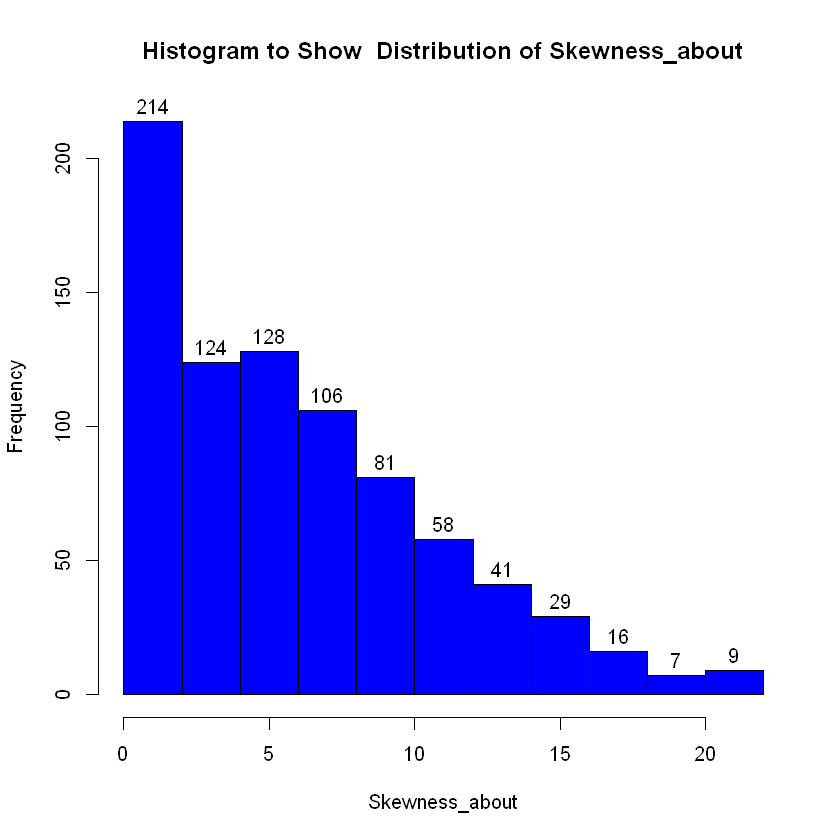

In [186]:
summary(vehicles$skewness_about)
hist(vehicles$skewness_about,
    col="blue",
    main="Histogram to Show  Distribution of Skewness_about",
    xlab="Skewness_about",
    ylab="Frequency",
    labels=TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    6.00   11.00   12.69   19.00   41.00 

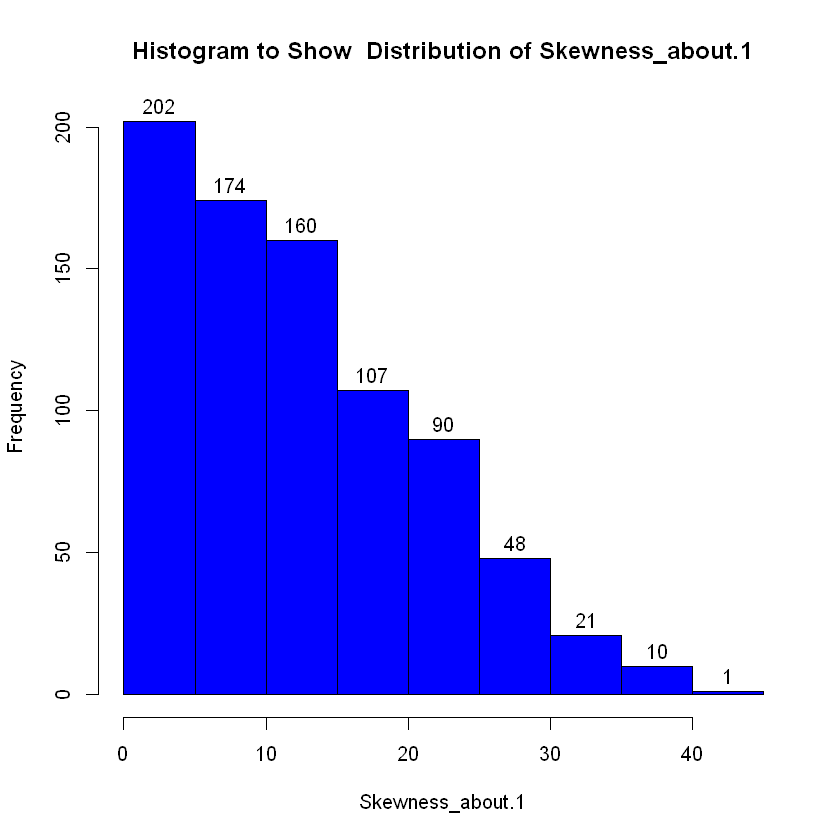

In [187]:
summary(vehicles$skewness_about.1)
hist(vehicles$skewness_about.1,
    col="blue",
    main="Histogram to Show  Distribution of Skewness_about.1",
    xlab="Skewness_about.1",
    ylab="Frequency",
    labels=TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    176     184     189     189     193     206 

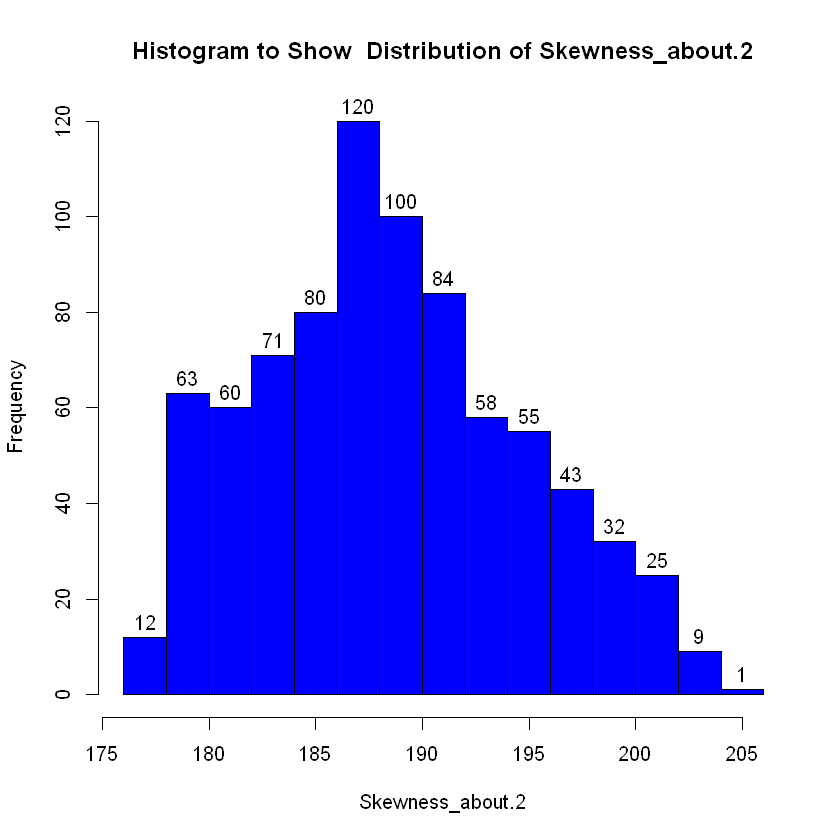

In [188]:
summary(vehicles$skewness_about.2)
hist(vehicles$skewness_about.2,
    col="blue",
    main="Histogram to Show  Distribution of Skewness_about.2",
    xlab="Skewness_about.2",
    ylab="Frequency",
    labels=TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  181.0   191.0   197.0   195.7   201.0   211.0 

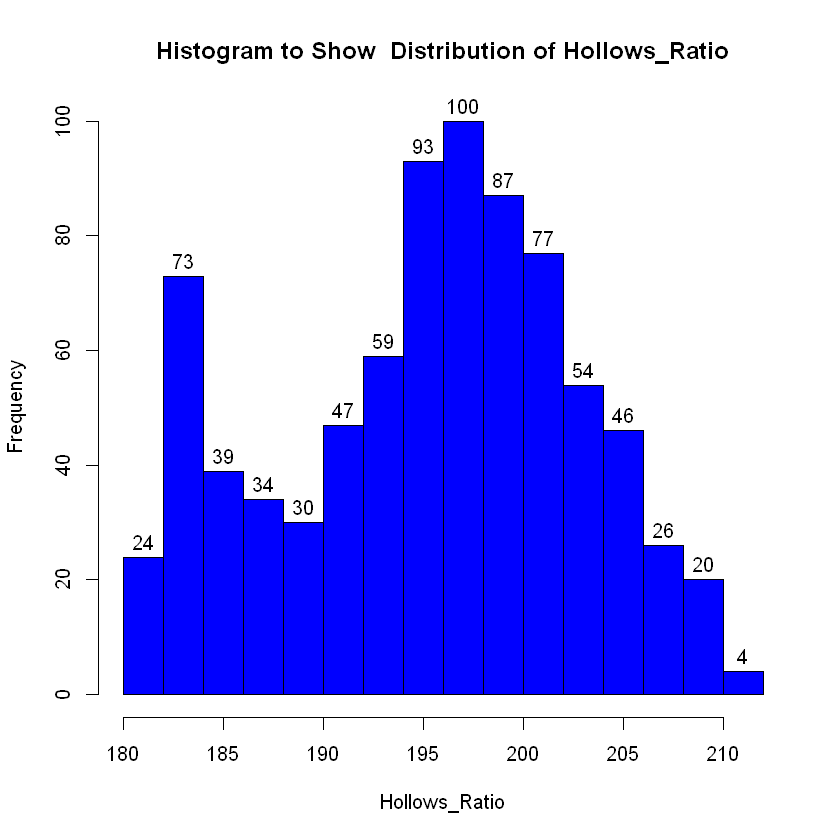

In [189]:
summary(vehicles$hollows_ratio)
hist(vehicles$hollows_ratio,
    col="blue",
    main="Histogram to Show  Distribution of Hollows_Ratio",
    xlab="Hollows_Ratio",
    ylab="Frequency",
    labels=TRUE)

This cell has the code to prepare the training and test data sets

In [190]:
split = sample.split(vehicles,SplitRatio = 0.7)
train = subset(vehicles,split==TRUE)
test = subset(vehicles,split==FALSE)
train$class <- NULL
test$class <- NULL
trainingoutcomes <- subset(vehicles,split == TRUE)
testoutcomes <- subset(vehicles,split==FALSE)
trainingoutcomes <- trainingoutcomes[,c("class")]
testoutcomes<- testoutcomes[,c("class")]

This code creates and run KNN model and gives its resultant confusion matrix

In [191]:
predictions <- knn(train = train,test = test,cl=trainingoutcomes,k=1)
testoutcomes <- factor(testoutcomes,levels = levels(predictions))
cm <- confusionMatrix(testoutcomes,predictions)
cm

Confusion Matrix and Statistics

          Reference
Prediction bus car van
       bus  44   3   1
       car  13 120  14
       van   6   2  53

Overall Statistics
                                          
               Accuracy : 0.8477          
                 95% CI : (0.7977, 0.8894)
    No Information Rate : 0.4883          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7503          
                                          
 Mcnemar's Test P-Value : 0.0002977       

Statistics by Class:

                     Class: bus Class: car Class: van
Sensitivity              0.6984     0.9600     0.7794
Specificity              0.9793     0.7939     0.9574
Pos Pred Value           0.9167     0.8163     0.8689
Neg Pred Value           0.9087     0.9541     0.9231
Prevalence               0.2461     0.4883     0.2656
Detection Rate           0.1719     0.4688     0.2070
Detection Prevalence     0.1875     0.5742     

Next section scales the train adn test dataset and the scaled datasets are used for the model

In [192]:
train_scaled <- scale(train[])
test_scaled <- scale(test[])
predictionsforscaled <- knn(train = train_scaled,test = test_scaled,
                            cl = trainingoutcomes,k = 1)
cm_scaled <- confusionMatrix(testoutcomes,predictionsforscaled)
cm_scaled

Confusion Matrix and Statistics

          Reference
Prediction bus car van
       bus  46   1   1
       car   8 129  10
       van   7   3  51

Overall Statistics
                                          
               Accuracy : 0.8828          
                 95% CI : (0.8369, 0.9195)
    No Information Rate : 0.5195          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8045          
                                          
 Mcnemar's Test P-Value : 0.003322        

Statistics by Class:

                     Class: bus Class: car Class: van
Sensitivity              0.7541     0.9699     0.8226
Specificity              0.9897     0.8537     0.9485
Pos Pred Value           0.9583     0.8776     0.8361
Neg Pred Value           0.9279     0.9633     0.9436
Prevalence               0.2383     0.5195     0.2422
Detection Rate           0.1797     0.5039     0.1992
Detection Prevalence     0.1875     0.5742     

This section contain the code to run the random forest model

In [193]:
target_var <- subset(vehicles$class,split==TRUE)
target_var <- factor(target_var)
formula <- target_var ~ .
rfmodel<- randomForest(formula,data = train)

In [194]:
rfmodpred<- predict(rfmodel,newdata = test)
cm_rf <- confusionMatrix(testoutcomes,rfmodpred)
cm_rf

Confusion Matrix and Statistics

          Reference
Prediction bus car van
       bus  48   0   0
       car   2 131  14
       van   2   2  57

Overall Statistics
                                          
               Accuracy : 0.9219          
                 95% CI : (0.8819, 0.9516)
    No Information Rate : 0.5195          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8692          
                                          
 Mcnemar's Test P-Value : 0.004637        

Statistics by Class:

                     Class: bus Class: car Class: van
Sensitivity              0.9231     0.9850     0.8028
Specificity              1.0000     0.8699     0.9784
Pos Pred Value           1.0000     0.8912     0.9344
Neg Pred Value           0.9808     0.9817     0.9282
Prevalence               0.2031     0.5195     0.2773
Detection Rate           0.1875     0.5117     0.2227
Detection Prevalence     0.1875     0.5742     

In [195]:
svmmodel <- svm(formula,data = train,kernel = "radial")
svmpreds <- predict(svmmodel,newdata = test)
cm_svm <- confusionMatrix(testoutcomes,svmpreds)
cm_svm

Confusion Matrix and Statistics

          Reference
Prediction bus car van
       bus  48   0   0
       car   0 142   5
       van   3   2  56

Overall Statistics
                                          
               Accuracy : 0.9609          
                 95% CI : (0.9293, 0.9811)
    No Information Rate : 0.5625          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.933           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: bus Class: car Class: van
Sensitivity              0.9412     0.9861     0.9180
Specificity              1.0000     0.9554     0.9744
Pos Pred Value           1.0000     0.9660     0.9180
Neg Pred Value           0.9856     0.9817     0.9744
Prevalence               0.1992     0.5625     0.2383
Detection Rate           0.1875     0.5547     0.2188
Detection Prevalence     0.1875     0.5742     

Next block of code removes the outlies from the datasets for each feature

In [196]:
filterdata<- vehicles[vehicles$radius_ratio < 250,]
filterdata <- filterdata[filterdata$pr.axis_aspect_ratio < 80,]
filterdata <- filterdata[filterdata$max.length_aspect_ratio < 15,]
filterdata <- filterdata[filterdata$scatter_ratio < 230,]
filterdata <- filterdata[filterdata$elongatedness < 60,]
filterdata <- filterdata[filterdata$pr.axis_rectangularity < 25,]
filterdata <- filterdata[filterdata$max.length_rectangularity < 180,]
filterdata <- filterdata[filterdata$scaled_variance < 280,]
filterdata <- filterdata[filterdata$scaled_variance.1 < 800 & filterdata$scaled_variance.1 >200,]
filterdata <- filterdata[filterdata$scaled_radius_of_gyration.1 < 90 & filterdata$scaled_radius_of_gyration.1 >60,]
filterdata <- filterdata[filterdata$skewness_about.2 < 204,]

In [197]:
filtered_trainingoutcomes <- subset(filterdata$class,split==TRUE)
filtered_testoutcomes <- subset(filterdata$class,split==FALSE)
filtered_train <- subset(filterdata,split==TRUE)
filtered_test <- subset(filterdata,split==FALSE)
filtered_train$class <- NULL
filtered_test$class <- NULL
filtered_train_scaled <- scale(filtered_train)
filtered_test_scaled<- scale(filtered_test)

KNN with filtered data

In [198]:
filtered_predictions <- knn(train = filtered_train,test = filtered_test,cl = filtered_trainingoutcomes,k = 1)
filtered_testoutcomes <- factor(filtered_testoutcomes,levels = levels(filtered_predictions))
filtered_cm <- confusionMatrix(filtered_testoutcomes,filtered_predictions)
filtered_cm

Confusion Matrix and Statistics

          Reference
Prediction bus car van
       bus  55   9   2
       car   7  83   3
       van   1   2  60

Overall Statistics
                                          
               Accuracy : 0.8919          
                 95% CI : (0.8434, 0.9295)
    No Information Rate : 0.4234          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.835           
                                          
 Mcnemar's Test P-Value : 0.8534          

Statistics by Class:

                     Class: bus Class: car Class: van
Sensitivity              0.8730     0.8830     0.9231
Specificity              0.9308     0.9219     0.9809
Pos Pred Value           0.8333     0.8925     0.9524
Neg Pred Value           0.9487     0.9147     0.9686
Prevalence               0.2838     0.4234     0.2928
Detection Rate           0.2477     0.3739     0.2703
Detection Prevalence     0.2973     0.4189     

KNN with filtered scaled data

In [200]:
filtered_predictions_scaled <- knn(train = filtered_train_scaled,test = filtered_test_scaled,cl = filtered_trainingoutcomes,k = 1)
filtered_testoutcomes <- factor(filtered_testoutcomes,levels = levels(filtered_predictions_scaled))
filtered_cm_scaled <- confusionMatrix(filtered_testoutcomes,filtered_predictions_scaled)
filtered_cm_scaled

Confusion Matrix and Statistics

          Reference
Prediction bus car van
       bus  65   1   0
       car   1  91   1
       van   1   9  53

Overall Statistics
                                          
               Accuracy : 0.9414          
                 95% CI : (0.9019, 0.9685)
    No Information Rate : 0.455           
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.91            
                                          
 Mcnemar's Test P-Value : 0.06018         

Statistics by Class:

                     Class: bus Class: car Class: van
Sensitivity              0.9701     0.9010     0.9815
Specificity              0.9935     0.9835     0.9405
Pos Pred Value           0.9848     0.9785     0.8413
Neg Pred Value           0.9872     0.9225     0.9937
Prevalence               0.3018     0.4550     0.2432
Detection Rate           0.2928     0.4099     0.2387
Detection Prevalence     0.2973     0.4189     

random forest with scaled data

In [203]:
target_var_filtered <- subset(filterdata$class,split==TRUE)
target_var_filtered <- factor(target_var_filtered)
formula_f <- target_var_filtered ~ .
rfmodel_f <- randomForest(formula_f,data = filtered_train)
rfmodpred_f <- predict(rfmodel_f,newdata = filtered_test)
cm_rf_f <- confusionMatrix(filtered_testoutcomes,rfmodpred_f)
cm_rf_f

Confusion Matrix and Statistics

          Reference
Prediction bus car van
       bus  66   0   0
       car   1  89   3
       van   1   2  60

Overall Statistics
                                          
               Accuracy : 0.9685          
                 95% CI : (0.9361, 0.9872)
    No Information Rate : 0.4099          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.952           
                                          
 Mcnemar's Test P-Value : 0.5319          

Statistics by Class:

                     Class: bus Class: car Class: van
Sensitivity              0.9706     0.9780     0.9524
Specificity              1.0000     0.9695     0.9811
Pos Pred Value           1.0000     0.9570     0.9524
Neg Pred Value           0.9872     0.9845     0.9811
Prevalence               0.3063     0.4099     0.2838
Detection Rate           0.2973     0.4009     0.2703
Detection Prevalence     0.2973     0.4189     

SVM with filtered data

In [204]:
svmmodel_f <- svm(formula_f,data = filtered_train,kernel="radial")
svmpreds_f <- predict(svmmodel,newdata = filtered_test)
cmsvm_f <- confusionMatrix(filtered_testoutcomes,svmpreds_f)
cmsvm_f

Confusion Matrix and Statistics

          Reference
Prediction bus car van
       bus  66   0   0
       car   1  90   2
       van   0   2  61

Overall Statistics
                                          
               Accuracy : 0.9775          
                 95% CI : (0.9482, 0.9926)
    No Information Rate : 0.4144          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9657          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: bus Class: car Class: van
Sensitivity              0.9851     0.9783     0.9683
Specificity              1.0000     0.9769     0.9874
Pos Pred Value           1.0000     0.9677     0.9683
Neg Pred Value           0.9936     0.9845     0.9874
Prevalence               0.3018     0.4144     0.2838
Detection Rate           0.2973     0.4054     0.2748
Detection Prevalence     0.2973     0.4189     